# Homework 3
## G20: Tommaso Di Mario, Valeria Sepicacchi, Federica Valeau

### Exercise 1
Polynomial regression is linear regression with increasing powers of a single covariate as explanatory variables:

$$ E(Y_i|x_i) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + ... + \beta_p x_i^p. $$

Quadratic regression is simply polynomial regression up to degree p = 2.
The dataset MLB contains the horizontal distance (in feet) traveled by a baseball hit at various angles (the initial speed of the ball at the bat is constant).

### 1)
Download the data and perform quadratic regression with Distance as response variable and Angle as explanatory
variable, with both Python routines and matrix computation. Comment on the goodness of fit of the model.

In [1]:
# Showing the data

import pandas as pd
import numpy as np

df = pd.read_csv('MLB.txt', sep=" ", header=None)
df.columns = ["Angle", "Distance"]
df = df.drop(labels=0, axis=0)
df

Angle Distance
1     10    115.6
2     15    157.2
3     20    189.2
4     24    220.8
5     30    253.8
6     34    269.2
7     40    284.8
8     45    285.0
9     48    277.4
10    50    269.2
11    58    244.2
12    60    231.4
13    64    180.4

We are going to perform a qadratic regression with the distance (response variable) and the angle (explanatory variable). We'll first compute it with a matrix and then using Python functions. 

The matrix representation of a general linear model  $ Y_i = \sum_j \beta_j x_{ij} $ is 

$$ \begin{pmatrix} y_1\\ y_2 \\ ... \\ y_n \end{pmatrix}  = \begin{pmatrix} 1 &  x_{11} & ... & x_{1p}\\ 1 & x_{21} & ... & x_{2p} \\ ... & ... & ... & ... \\ 1 & x_{n1} & ... & x_{np}  \end{pmatrix}  \begin{pmatrix} \beta_1\\ \beta_2 \\ ... \\ \beta_p \end{pmatrix}  $$

with the vector Y containing the response variables and the big n x (p+1) matrix containing the explanatory variables.

The matrix representation for our quadratic regression instead is given by:

$$ \begin{pmatrix} y_1\\ y_2 \\ ... \\ y_{13} \end{pmatrix}  = \begin{pmatrix} 1 &  x_{1} & x_{1}^2\\ 1 & x_{2} & x_{2}^2 \\ ... & ... & ...  \\ 1 & x_{13}  & x_{13}^2  \end{pmatrix}  \begin{pmatrix} \beta_0\\ \beta_1 \\ \beta_2 \end{pmatrix} $$

with the vector y indicating the distances and the vector x as the angles.

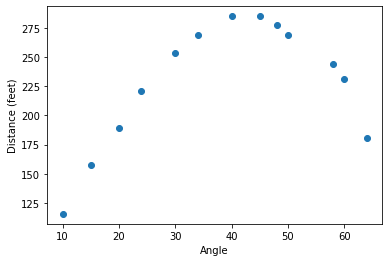

In [2]:
import matplotlib.pyplot as plt

# plot of the points

x = []
y = []
# converting the dataframe to representable data
for el in df.Angle:
    x.append(float(el))
for el in df.Distance:
    y.append(float(el))
plt.scatter(x, y)

# lableling axes
plt.ylabel('Distance (feet)')
plt.xlabel('Angle')

plt.show()

Now we will solve the linear system: first we have to build the matrix X, then we will perform the matrix multiplication   $ \hat\beta = X^T y $

In [3]:
# Solving the linear system analytically
Y = np.array(y)
X = []

# adding the quadratic elements for each x
for el in x:
    X.append([])
    X[-1].append(1)
    X[-1].append(el)
    X[-1].append(el**2)
X = np.array(X)

# inverting the matrix for computations
X_t = np.linalg.pinv(X)

# our output vector
beta = np.matmul(X_t, Y)
print(f"Beta0 = {beta[0]}, \nBeta1 = {beta[1]}, \nBeta2 = {beta[2]}.")


Beta0 = -21.897744664959284, 
Beta1 = 14.521171330582664, 
Beta2 = -0.17371411371731338.


From the calculation we got that the model estimated coefficients are   $ \beta_0 =-21.898, \ \beta_1=14.521,\ \beta_2=-0.174. $ The quadratic regression function then will be  $ \hat\mu = -21.898 + 14.521x -0.174 x^2. $

Now let's double check our results using the quadratic regression statistical eqations for the coefficients:

$$ \beta_0 = \frac{\sum_{i=0}^n y_i}{n} - \beta_1 \frac{\sum_{i=0}^n x_i}{n} - \beta_2 \frac{\sum_{i=0}^n x^2_i}{n} $$
$$\beta_1 = \frac{S( xy)S( x^4)-S( x^2y)S( x^3)}{S(x^2)S( x^4) - (S( x^3))^2} $$
$$ $$
$$\beta_2 = \frac{S( x^2y)S( x^2)-S( xy)S(x^3)}{S(x^2) S( x^4) - (S( x^3))^2} $$

where 
$$ S(x^2) = \sum_{i=0}^n x_i^2- \frac{(\sum_{i=0}^n x_i)^2}{n} \quad \quad $$
$$ S(xy) = \sum_{i=0}^n x_iy_i- \frac{\sum_{i=0}^n x_i\sum_{i=0}^n y_i}{n} \quad $$
$$S(x^3) = \sum_{i=0}^n x_i^3- \frac{\sum_{i=0}^n x_i \sum_{i=0}^n x_i^2}{n} \quad \quad  $$
$$S(x^2y) = \sum_{i=0}^n x_i^2 y_i- \frac{\sum_{i=0}^n y_i \sum_{i=0}^n x_i^2}{n} \quad $$
$$S(x^4) = \sum_{i=0}^n x_i^4- \frac{(\sum_{i=0}^n x_i^2)^2}{n} $$

In [4]:
x2 = 0 
xy=0
x3=0
x2y=0
x4=0

# computing the sums
for i in range(len(x)):
    x2+=x[i]**2
    xy +=x[i]*y[i]
    x3+= x[i]**3
    x2y+=(x[i]**2)*y[i]
    x4+= x[i]**4
    
xx = x2
x3-= (sum(x)*x2)/len(x)
x2y -= (x2*sum(y))/len(x)
x4 -= (x2**2)/len(x)
x2-= (sum(x)**2)/len(x)
xy-= (sum(x)*sum(y))/len(x)

# our coefficients
beta2 = ((x2y*x2)-(xy*x3))/((x2*x4)-x3**2)
beta1 = ((xy*x4)-(x2y*x3))/((x2*x4)-x3**2)
beta0 = (sum(y)/len(x)) - beta1*(sum(x)/len(x)) - beta2*(xx/len(x))
print(f"Beta0 = {beta0}, \nBeta1 = {beta1}, \nBeta2 = {beta2}.")

Beta0 = -21.897744664953848, 
Beta1 = 14.52117133058247, 
Beta2 = -0.17371411371731021.


This computation gave us pretty much the same results, now let's see with python routines:

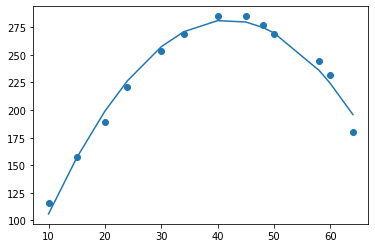

In [5]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

x = np.array(x)
# adding polynomial features to our data
poly_feat = PolynomialFeatures(degree=2)
X = np.reshape(x, (-1, 1))
xp = poly_feat.fit_transform(X)

# creating the model
model = sm.OLS(y, xp).fit()
ypred = model.predict(xp) 

plt.scatter(x,y)
plt.plot(x,ypred)


In [6]:
# printing the summary of the model
model.summary()

/Users/tommasodimario/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     261.3
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.33e-09
Time:                        22:15:54   Log-Likelihood:                -43.890
No. Observations:                  13   AIC:                             93.78
Df Residuals:                      10   BIC:                             95.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.8977     11.230     -1.950      0.080     -46.921       3.125
x1            14.5212      0.676     21.490      0.000      13.016      16.027
x2            -0.1737      0.009    -19.563      0.000      -0.193      -0.154
==============================================================================
Omnibus:                        1.471   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                0.904
Skew:                          -0.620   Prob(JB):                        0.636
Kurtosis:                       2.634   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are happy to notice that the results we got for the coefficients are the same that we obtained by hand-building the matrix.

Let's look at the goodness of fit now. The next plot will contain the data and the quadratic regression function given by the coefficients that we found.

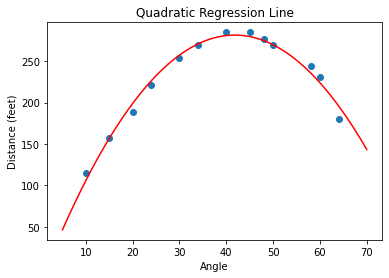

In [7]:
plt.scatter(x, y)

# labelling
plt.ylabel('Distance (feet)')
plt.xlabel('Angle')
xx = np.linspace(5,70,1000)
plt.title("Quadratic Regression Line")

# quadratic regression function
yy = beta0 + beta1*xx + beta2*xx**2
plt.plot(xx,yy, 'r')

plt.show()

From the graph, we can say that our regression function fits very good. Now let's consider some statistics: the standard errors for $\beta_0$ is 11.23, it's actually quite high, while the standard errors for $\beta_1$ and $\beta_2$ are 0.676 and 0.009, they are very low.

Let's observe a few more graphs

In [8]:
# computing the errors
yhat = beta0 + beta1*x + beta2*x**2
e = y-yhat
e

array([  9.65744273,   0.36585029,  -9.84003646,  -5.75103777,
        -3.59469291,  -1.80856512,   3.79347339,   5.21611507,
         2.5188388 ,  -0.67553757,   8.24408604,   7.39827421,
       -15.52421071])

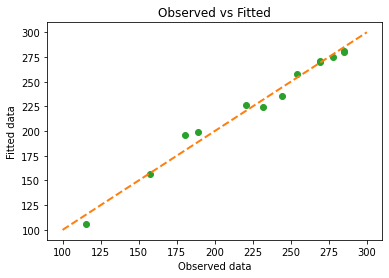

In [9]:
plt.title("Observed vs Fitted") 
plt.xlabel("Observed data") 
plt.ylabel("Fitted data") 
plt.plot([100, 300], [100, 300], '--', lw=2, c='#ff7f0e')
plt.scatter(y,yhat, c='#2ca02c')
plt.show()

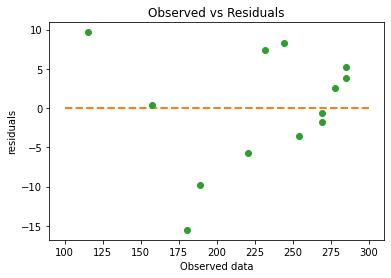

In [10]:
plt.title("Observed vs Residuals") 
plt.xlabel("Observed data") 
plt.ylabel("residuals") 
plt.plot([100, 300], [0, 0], '--', lw=2, c='#ff7f0e')
plt.plot(y,e, "o", c='#2ca02c') 
plt.show()

In the end, we are satisfied with the fit of our quadratic regression, the greatest value for the error is |15.5| and the comparison between fitted values and observed ones gives a good result.

## 2)
What is the average distance we would observe with an angle of 27 degrees? What is the interpretation of  $- \frac{\beta _1}{2 \beta _2}$?

To find the average distance that we would observe having an angle of 27 degrees we just need to plug in the value 27 in our regression function.

In [11]:
ang = 27
dist = round(beta0 + beta1*ang + beta2*(ang**2),3)
print(f"The distance observed with the angle of 27 degrees is {dist} feet.")

The distance observed with the angle of 27 degrees is 243.536 feet.


To understand better the interpretation of $ -\frac{\beta_1}{2\beta_2} $ we compute it first.

the vertex is at x = 42.0, then the angle that gives the greatest distance travelled is 42.0 degrees


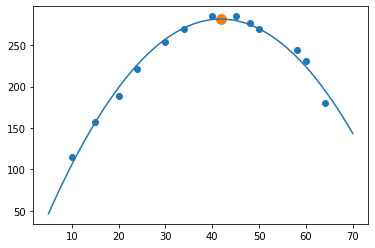

In [12]:
ver = -1*beta[1]/(2*beta[2])
print(f'the vertex is at x = {round(ver,0)}, then the angle that gives the greatest distance travelled is {round(ver,0)} degrees')
y_ver = beta0 + beta1*ver + beta2*(ver**2)
plt.scatter(x,y)
plt.plot(xx,yy)
plt.scatter(ver, y_ver, c='#ff7f0e', linewidths=5)
plt.show()

As we can observe,  $ -\frac{\beta_1}{2\beta_2} = 42^{\circ} $ indicates the angle that gives the greatest distance. Geometrically speaking, it's the vertex of the parabola created by the quadratic regression, and in this case it indicates the maximum of the function (since  $ \beta_2 $ is negative). 

We expected a result near to $ 45 ^{\circ} $ since we are representing the relationship between angle and distance in a parabolic motion. If we neglect the mass of the ball we can think of explaining our problem as a projectile motion.  

Thanks to some Physics rules, we know that the equation which describes the projectile motion can be analyzed using the tools for two-dimensional motion and making assumption that air has no effect on the projectile.
We can write the initial velocity in terms of the two components, along the x axis and y axis, as 
$$ v_{0x}=v_0 cos(\theta _0)$$
$$ v_{0y}=v_0 sin(\theta _0)$$
Where $\theta$ is the angle at which the ball is launched.

Because there is no acceleration in the horizontal direction, the horizontal component $ v_x$ of the projectile’s velocity remains unchanged from its initial value $ v_{0x} $ throughout the motion.
The horizontal displacement (the distance) is computed as 
$$x - x_0 = v_0 cos(\theta _0)t $$

The vertical motion, instead, has a constant acceleration downward, due to gravity and it's defined as 
$$ y - y_0 = (v_{0} sin(\theta _0))t - \frac{1}{2}gt^2 $$

From this notions we understand the equation of the ball's path (its trajectory) by "eliminating" time t and after a little rearrangement,  that is
$$y  = (tan \theta _0)x - \frac{g x^2}{2(v_0 cos \theta _0)^2} $$

The horizontal range R of the projectile is the horizontal distance the projectile has traveled when it returns to its initial height (the height at which it is launched). We replace $ x-x_0 = R$ and $y-y_0$ in the above formulas, so to get
$$ R = v_0 cos(\theta _0)t$$
$$ 0= (v_{0} sin(\theta _0))t - \frac{1}{2}gt^2$$

Eliminating t between these two equations yields 
$$ R = \frac{2v_0^2}{g}sin\theta _0 cos \theta _0$$
Using the identity $sin 2\theta _0 = 2 sin \theta _0 cos \theta _0 $ we obtain 
$$ R = \frac{v_0^2}{g}sin(2 \theta _0)$$

Note that  R has its maximum value when $sin 2 \theta _0 = 1$, which corresponds to $2 \theta _0 = 90^{\circ} $ or $ \theta_0 = 45 ^{\circ}$.
Now we understood why the horizontal range R is maximum for a launch angle of $45 ^{\circ}$ and that is not an accident if the maximum distance (the vertex of the parabola) is around $45 ^{\circ}$. Of course it's not precisely $45 ^{\circ}$ because of two assumptions, that the mass of the ball is negligible (and in our real word it is not) and that the air through which the projectile moves has no effect on its motion, but of course in reality the air resists the motion.

In this very context, a baseball player could use quadratic regression to find the angle that will allow him to send the ball as far as possible.

## 3)
Compute the correlation between Distance and Angle. Would simple linear regression be adequate for this problem?
Motivate your answer.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [14]:
df = pd.read_csv('MLB.txt', sep=" ", header=None)
df.columns = ["Angle", "Distance"]
df = df.drop(labels=0, axis=0)
df['Angle'] = pd.to_numeric(df['Angle'])
df['Distance'] = pd.to_numeric(df['Distance'])

We see that there is a correlation between two variables when they are related in some way. First we plot (again) the two variables of interest, Angle and Distance, to understand if there is, eventually, some kind of relationship or a pattern.

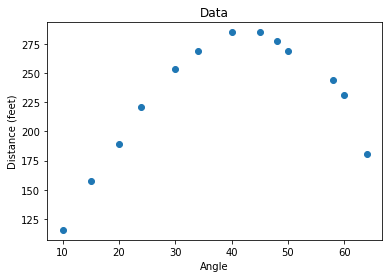

In [15]:
plt.title('Data')
plt.ylabel('Distance (feet)')
plt.xlabel('Angle')
x = df['Angle']
y = df['Distance']
plt.scatter(x,y)
plt.show()

We can clearly see a pattern in the above visualization, then we expect the correlation to be higher than 0.
We proceed computing analytically the correlation, to get a more precise measure, using the linear correlation coefficient, defined as follows
$$ r= \frac{s_{xy}}{s_xs_y} = \frac{\sum\limits_{i=1}^n (x_i - \bar{x} )(y_i - \bar{y})}{ \sqrt{\Bigl [\sum\limits_{i=1}^n (x_i - \bar{x})^2 \Bigr ] \Bigl [\sum\limits_{i=1}^n(y_i - \bar{y})^2 \Bigr]}} $$
where $s_x$ and $s_y$ are respectively the sample standard deviation of x and y and $s_{xy}$ is the sample covariance between x and y.
From this formula we get 
$$ r = \hat{ \beta _1}(\frac {s_x}{s_y})$$

To analyze our data and try fitting a simple linear regression model, we use a method from the statsmodel library, called Ordinary Least Squares (ols()), that is a common technique for analyzing linear regression.

In [16]:
#The Ordinary Least Squares function from the statsmodel library
fitd = smf.ols( formula = 'Distance ~ Angle', data = df).fit()
print(fitd.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.919
Date:                Mon, 16 May 2022   Prob (F-statistic):             0.0733
Time:                        22:16:52   Log-Likelihood:                -67.748
No. Observations:                  13   AIC:                             139.5
Df Residuals:                      11   BIC:                             140.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    169.5137     32.935      5.147      0.0

/Users/tommasodimario/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using the summary() method we get a lot of information about our linear regression model, for example the R-squared value, that is the measurement of how much of the independent variable is explained by changes in our dependent variables. 

R-squared, indeed, evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

Usually, but not always, the larger the R-squared (it is always between 0 and 100%), the better the regression model fits your observation.
In our case, 0.263 would mean our model explains 26.3% of the change in our ‘Distance’ variable and since it's a quite low value, we could end up noticing a lack of fit of the model.

Our regression function is $ \hat{u} =   1.56x + 169.51$, since $ \hat{\beta}_0 = 169.51 $ and $ \hat{\beta}_1 = 1.56$. We also understood, from the summary, that   $\widehat{se}(\widehat{\beta}_0) = 32.94 $ and $\widehat{se}(\widehat{\beta}_1) = 0.79$.


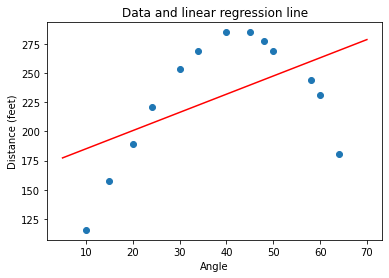

In [17]:
plt.title('Data and linear regression line')
plt.ylabel('Distance (feet)')
plt.xlabel('Angle')

x = df['Angle']
y = df['Distance']
xx = np.linspace(5,70,1000)
#we write y as a function of x, having computed the regression function 
yy = 169.51 + 1.56*xx
#first we plot the simple linear regression, then with the scatter method we plot the points
plt.plot(xx,yy, 'r')
plt.scatter(x,y)
plt.show()

As shown in the above graph (and we already had an hint when we got a low R-squared value) a simple linear regression model fits quite poorly our original data.

We now use a scipy method that is used to calculate the parameters that establish a linear relationship between two sets of variable.
The regression equation we are trying to find using the linregress method can determine the value of one set of the variable given the values for the other variable set.

The method returns an object of the LinregressResult class and we can apply different method to get information about it, like the correlation between the two variables.

In [18]:
#linregress method takes as input two sets of measurements, both arrays should have the same length
result = linregress(x,y)
#the method rvalue applied on an object of the LinregressResult class returns the correlation coefficient
correlation = result.rvalue
print('The correlation coefficient between the two variables is',round(correlation,2))



The correlation coefficient between the two variables is 0.51


Now that we have seen that a linear model isn't the best idea, let's try using (as in the previous exercises) a non linear regression model, using the curve_fit method from the scipy.optimize library, inst

First, we define a non linear function that will be passed as parameter to the curve_fit model, and that is going to describe our data.

In [19]:
#define a function of x
def func1(x, a, b, c):
    return a*x**2+b*x+c

<function matplotlib.pyplot.show(close=None, block=None)>

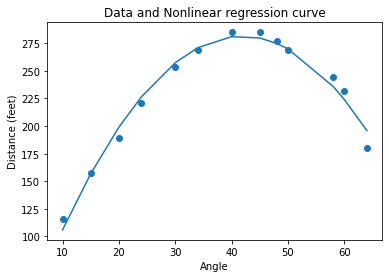

In [20]:
plt.title('Data and Nonlinear regression curve')
plt.ylabel('Distance (feet)')
plt.xlabel('Angle')
#the curve fit method returns a list of parameters, in brief the coefficient of our non linear model
params,_ = curve_fit(func1,xdata=x,ydata=y)
#a,b,c are the parameters 
a,b,c = params[0],params[1],params[2]
#yfit1 is a function of x, having as coefficients the parameters obtained with the curve_fit method
yfit1 = a*x**2+b*x+c
#plot the original data points and the fitted model
plt.scatter(x,y)
plt.plot(x,yfit1)
plt.show

Now it's clear that, whereas a linear regression model doesn't work well with our data, a non linear one is a better approximation.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.1)
Load the pre–processed data for a single TD subject and a single ASD subject contained in the two files td_data.csv and
asd_data.csv respectively. Each one will correspond to a data-matrix of size (145 × 116): the 116 columns are related
to different ROIs, whereas the 145 rows are the observation 

In [4]:
df_asd = pd.read_csv("asd_data.csv")
df_asd

2001         2002        2101         2102         2111  \
0      22.947140   353.228333 -323.652283 -1127.181396   204.197540   
1    -193.059830  -704.822388 -139.608780  -440.817749  -598.632202   
2    -540.828613 -2105.142090  363.960449   439.604706 -1323.473145   
3    -665.969788 -2788.440918  823.377014   837.064331 -1433.688965   
4    -352.062927 -2106.763672  793.675171   567.487854  -874.346619   
..           ...          ...         ...          ...          ...   
140  1443.315308  1540.891113  496.398529  -946.026184  2009.105469   
141  1362.526245  1784.604980  377.911224 -1475.127197   577.524292   
142   586.768311  1362.408813  288.988983 -1423.769287  -938.028625   
143  -122.342865   679.025818  448.497559  -899.486877 -1301.685913   
144  -274.657227   147.608734  706.095703  -294.577911  -504.416321   

            2112         2201         2202         2211         2212  ...  \
0     478.385132  -866.067749 -1165.415161  -119.701714 -1025.295288  ...   
1    1018.791321  -544.656616  -387.688751 -1464.299194 -1296.567139  ...   
2    1032.643921   308.148499   844.762329 -2103.141113  -854.293762  ...   
3     459.622772  1026.960449  1609.277466 -2016.290771   -13.010733  ...   
4    -277.650543  1023.432617  1300.285767 -1873.167480   773.248230  ...   
..           ...          ...          ...          ...          ...  ...   
140  1702.927368   399.800049 -1186.609131  -216.050903 -1438.215942  ...   
141   848.894104   354.166199  -879.203735   720.323303 -1731.293823  ...   
142    89.166000   -71.462486  -598.833374  1147.558838  -618.711670  ...   
143  -318.053864  -460.606598  -530.112000  1254.441650   890.902100  ...   
144  -365.808655  -479.694641  -512.014404  1182.878418  1506.910278  ...   

            9081         9082          9100         9110         9120  \
0     340.011871  -196.249634  -6428.921875  -975.248291   265.547943   
1    -317.704041  1871.869629  -4227.546875   783.988464  1036.648926   
2   -1248.567017  2870.742920   -185.189026   484.686859  1069.806885   
3   -2219.704590  1845.864380   2688.854980 -1587.494629   604.038086   
4   -2808.884033  -250.736938   2859.234863 -2806.189941   293.312958   
..           ...          ...           ...          ...          ...   
140 -2511.773682 -4924.520508  13814.431641  5133.098633  -173.817535   
141  -810.792847 -2648.963867  10114.390625  1861.955566  -253.628403   
142  1531.619995  2361.627441   6094.263184  1434.645996  -331.078827   
143  3000.018311  5881.843750   4010.322021  3484.380615  -656.048828   
144  2723.655518  5196.768066   3388.704346  4354.737793 -1217.962280   

            9130         9140         9150         9160          9170  
0    -344.212189  1529.132202  -309.075928  2635.146729   -971.166992  
1     360.256409  3187.569580  1339.726807   333.593109  -3575.005127  
2     614.549744  2384.630615  2586.198242 -1447.853394  -3595.536377  
3     318.048218  -416.550781  2284.475098 -1231.970825  -1874.400146  
4      27.908560 -2533.836182   728.150269   292.893829  -1207.221436  
..           ...          ...          ...          ...           ...  
140 -2233.673096 -3089.018555 -1194.405151  6970.747559   5307.125977  
141  -949.538086 -1396.228394  -517.056885  9777.251953   8251.376953  
142   865.012573  1688.663940   896.624390  9350.472656  10271.273438  
143  1361.691162  3320.295654  2090.439453  7206.414551  11223.474609  
144   297.573395  2430.635254  2171.889160  4759.965332  10045.377930  

[145 rows x 116 columns]

In [5]:
df_td = pd.read_csv("td_data.csv")
df_td

2001         2002         2101         2102         2111  \
0    -775.318237 -1712.732300  1596.080566  1336.571289 -1300.354980   
1    -662.916382 -1826.256836  1268.610840  2062.874268  -308.994843   
2    -435.558441 -1188.196655   303.612457  2032.437500   576.011597   
3    -202.732849  -137.048233  -697.632446  1188.078857   765.562805   
4      32.426514   664.038757 -1252.125854   100.987083   502.935455   
..           ...          ...          ...          ...          ...   
140 -1016.250305 -1404.377197  -964.827209  -279.944183  -205.400986   
141 -1078.169800 -1569.155151   -14.898828  -382.908905 -1179.071655   
142  -546.607971  -943.028809  1013.394653  -188.462051 -1342.556274   
143   -77.775223  -199.199722  1262.238770   149.904358  -818.610229   
144   -44.854847   177.200073   646.075378   350.027008  -203.253052   

            2112         2201         2202         2211         2212  ...  \
0     740.557495   487.822693  1619.451416 -1458.715332   329.972229  ...   
1    1678.103638   608.315186  1584.528564 -1229.021362   919.158813  ...   
2    2094.956299   257.074768   877.734863  -269.488037  1181.894409  ...   
3    1660.083130  -470.239655   -76.098923  1160.720093   960.484680  ...   
4     773.418640 -1079.035034  -726.218628  2274.002686   504.836487  ...   
..           ...          ...          ...          ...          ...  ...   
140   560.759949  -960.844604 -1651.141113 -1093.343506   590.977417  ...   
141   378.018005  -288.120483 -1369.890503 -1803.674927   564.378845  ...   
142    17.809584   539.088745  -318.346924 -1835.113159    61.957272  ...   
143  -304.194946   731.509583   721.531921 -1216.999023  -532.219666  ...   
144  -422.992889   216.774979  1123.456665  -358.170654  -654.084167  ...   

            9081         9082         9100          9110         9120  \
0   -1777.227051  1273.565063  3425.178711   7470.447266 -2996.975586   
1   -1729.361938  -267.181122  -875.816650   5033.257324  -830.315796   
2    -807.103882 -2820.631104 -6095.926758  -3930.514404   943.832520   
3     110.920395 -3862.977783 -8352.865234 -11869.398438   249.758636   
4     355.237427 -1961.764771 -6930.793945 -11949.970703 -2109.260498   
..           ...          ...          ...           ...          ...   
140 -1044.808472  -879.578125  3624.310791   -472.750702 -1056.343628   
141 -1711.436279  -587.619446  6611.712891   3455.409912  2479.428955   
142 -1904.707275   104.447479  5745.029785   2962.563721  4133.479980   
143 -1050.978882   367.559174  1648.673340  -1489.837769  3723.711670   
144   195.071457   -29.519554 -2038.726562  -4487.654297  2390.838379   

            9130         9140         9150          9160         9170  
0   -1979.905029  1209.175659  -948.183228  11494.542969  7014.057617  
1   -1590.633667   723.985352  -850.386963  13733.220703  6706.122070  
2   -1038.594727  -169.874863  -224.612473   4894.343262  1612.286499  
3   -1449.962402 -1225.008545  -453.437775  -9051.173828 -4934.585938  
4   -2924.234375 -2221.085693 -2218.938721 -17074.806641 -8853.764648  
..           ...          ...          ...           ...          ...  
140  -435.694031  1211.995972   564.844055   1513.181885  3486.867920  
141  3117.529785  3304.096680   474.666565  -1451.234619  1406.032715  
142  3579.208740  2867.953125  -117.222382  -1116.485229  -131.008270  
143  1273.739136   602.829834  -831.372986   -541.541443 -1956.297485  
144  -842.814392  -984.930786  -834.854187  -1344.888550 -3339.458008  

[145 rows x 116 columns]

In [6]:
columns_td = list(df_td.columns)
columns_asd = list(df_asd.columns)

## 2.2)

Let ρ be the Pearson correlation. Use Nonparametric Bootstrap + Bonferroni correction to get two separate
estimates, $\hat{\mathcal{G}}^{ASD}(t)$ and $\hat{\mathcal{G}}^{TD}(t)$, of the true association graphs based on 95% bootstrapped confidence intervals for $ \{ ρ^{
ASD}_{j,k}\} _{j,k} $ and $ \{ ρ^{
TD}_{j,k}\} _{j,k} $



A confidence interval at level (1- $\alpha$) is a random set computed from the given data $X_n = {X_1,...,X_n} \sim F_X()$ such that 
$$ P_{F_X}(\theta \in C_n( \alpha)) \geq 1 - \alpha $$
We need detailed knowledge of the distribution $F_X()$, but we can use bootstrap methods to construct approximate confidence interval.

To make confidence intervals for the unknown parameter $\theta$ we use the Percentile Interval method, that is to take the $\frac{\alpha}{2}$ and $1- \frac{\alpha}{2}$ quantiles of the bootstrap empirical distribution as endpoints of our approximate $ (1-\alpha)$ confidence interval.

In [91]:
from math import factorial as fact

#the following cell code is a bit messy but we wanted to fit it all here since it takes a bit to compute
B = 10
D = 116
t1 = 0.5
t2 = 0.7
alpha = 0.05 
alphab = 0.05/ (fact(D)/(fact(D-2)*fact(2)))

#here we initialize a matrix for each treshold + a bonus matrix without bonferroni
mat_td0nb = [[0] * D for _ in range(D)]
mat_asd0nb = [[0] * D for _ in range(D)]
mat_td0 = [[0] * D for _ in range(D)]
mat_asd0 = [[0] * D for _ in range(D)]
mat_td1 = [[0] * D for _ in range(D)]
mat_asd1 = [[0] * D for _ in range(D)]
mat_td2 = [[0] * D for _ in range(D)]
mat_asd2 = [[0] * D for _ in range(D)]

highly_corr = [] #list to keep track of the most correlated ROIS
highly_corr_nb = []
c = [0] * 8
cb1_td = 0
cb1_asd = 0
for j in range(D):
    #this nested for loop runs in O(n(n+1)/2) == nc2 = 6670 in our case for a computation time sake B is smaller than it should 
    for k in range(j + 1,D): 
        boot_td = np.zeros(B)
        boot_asd = np.zeros(B)
        for b in range(B):
            x_boot_td = df_td[[columns_td[j], columns_td[k]]].sample(n = len(df_td), replace = True)
            x_boot_asd = df_asd[[columns_asd[j], columns_asd[k]]].sample(n = len(df_asd), replace = True)
            #Pandas sample() is used to generate a sample random row from the function caller data frame.
            boot_td[b] = x_boot_td.corr().iloc[0,1]
            boot_asd[b] = x_boot_asd.corr().iloc[0,1]
            
        lw_td = np.quantile(boot_td, q = alpha/2)
        up_td = np.quantile(boot_td, q = 1 - alpha/2)
        lw_asd = np.quantile(boot_asd, q = alpha/2)
        up_asd = np.quantile(boot_asd, q = 1 - alpha/2)
        
        lw_tdb = np.quantile(boot_td, q = alphab/2)
        up_tdb = np.quantile(boot_td, q = 1 - alphab/2)
        lw_asdb = np.quantile(boot_asd, q = alphab/2)
        up_asdb = np.quantile(boot_asd, q = 1 - alphab/2)
        
        if (up_td < 0 or lw_td > 0):
            mat_td0nb[j][k] = 1 
            c[0] += 1
            
        
        if (up_asd < 0 or lw_asd > 0):
            mat_asd0nb[j][k] = 1  
            c[1] += 1
        
        if (up_tdb < 0 or lw_tdb > 0):
            
            mat_td0[j][k] = 1
            c[2] += 1
            
         
        if (up_asdb < 0 or lw_asdb > 0):
            mat_asd0[j][k] = 1 
            c[3] += 1
        
        if (up_tdb < -t1 or lw_tdb > t1):
            mat_td1[j][k] = 1 
            c[4] += 1
            
        if (up_asdb < -t1 or lw_asdb > t1):
            mat_asd1[j][k] = 1 
            c[5] += 1
            
        if (up_td < -t1 or lw_td > t1):
            cb1_td += 1
            
        if (up_asd < -t1 or lw_asd > t1):
            cb1_asd += 1

        if (up_tdb < -t2 or lw_tdb > t2):
            mat_td2[j][k] = 1
            c[6] += 1
         
        if (up_asdb < -t2 or lw_asdb > t2):
            mat_asd2[j][k] = 1
            c[7] += 1 
        
        if (lw_asdb > 0.8 or up_asdb < -0.8):
            highly_corr.append((lw_asdb,up_asdb,"asd",columns_asd[j],columns_asd[k]))
            
        if (lw_tdb > 0.8 or up_tdb < -0.8):
            highly_corr.append((lw_tdb,up_tdb,"td",columns_td[j],columns_td[k]))
            
        if (lw_asd > 0.8 or up_asd < -0.8):
            highly_corr_nb.append((lw_asd,up_asd,"asd",columns_asd[j],columns_asd[k]))
            
        if (lw_td > 0.8 or up_td < -0.8):
            highly_corr_nb.append((lw_td,up_td,"td",columns_td[j],columns_td[k]))
        


Now let's see the actual graph we came up with without bonferroni correction with $\alpha = 0.05$ and $t = 0$. 
In the case of $t = 0$ is sufficient to just check that 0 is not included in our confidence interval. (the conditions for $t$ and $-t$ will be useful in the next point when we will have to tweak the value of t in order to reduce the multiplicity).
So let's check the graphs that come out of these estimate, being the treshold $t$ very low we expect to have a very dense graph

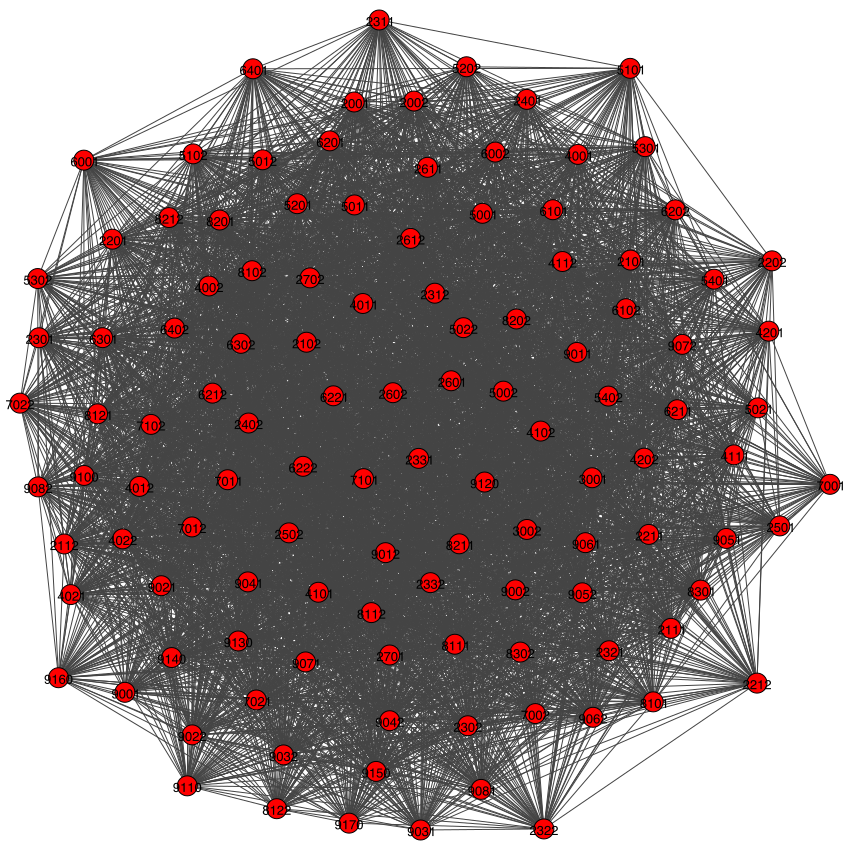

In [92]:
import igraph as ig

g_undir_td = ig.Graph.Adjacency(mat_td0nb, mode = 'undirected')
g_undir_td.vs["name"] = columns_td  # add additional info to the vs (vertex set)
#print(g_undir_td)

g_undir_td.vs["label"] = columns_td
ig.plot(g_undir_td, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))


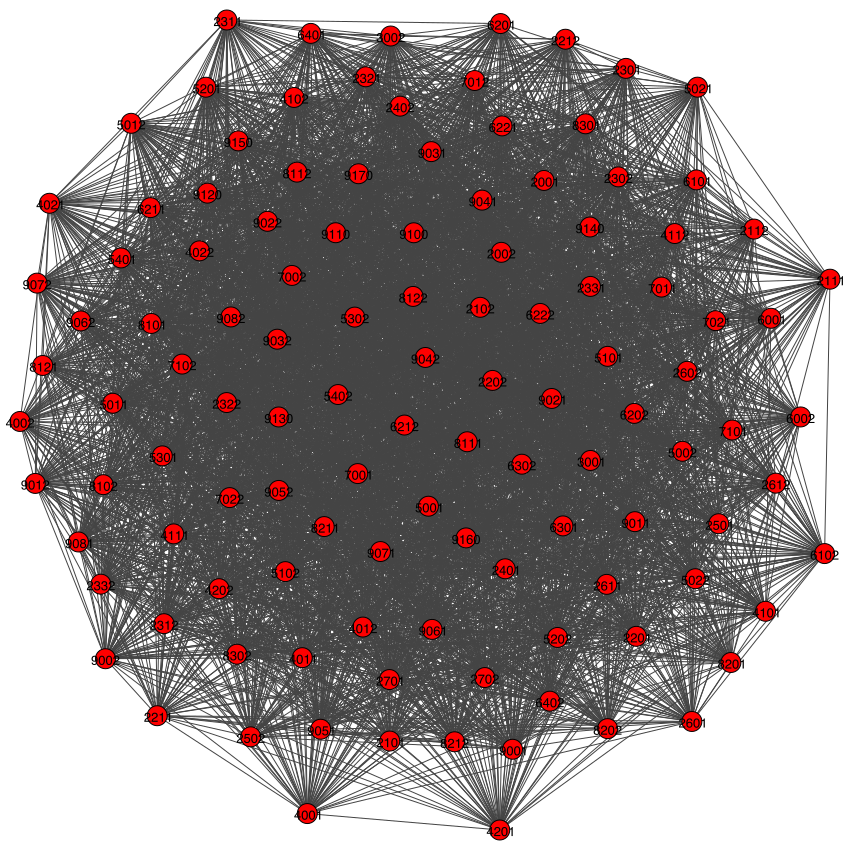

In [93]:

g_undir_asd = ig.Graph.Adjacency(mat_asd0nb, mode = 'undirected')
g_undir_asd.vs["name"] = columns_asd  # add additional info to the vs (vertex set)
#print(g_undir_asd)
#g_undir.get_adjacency()
g_undir_asd.vs["label"] = columns_asd
ig.plot(g_undir_asd, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))


As we expected we have a really dense graph with 4492(ASD) and 4322(TD) edges now let's try with the bonferroni correction, we expect to have a lower number of connection but still the graph will probably be really really dense.

Bonferroni correction, also known as the Bonferroni type adjustment, is a method used to compensate for Type I error, that is the likelihood of discovering a false-positive result, thus rejecting a true null hypothesis.
The alpha level is case dependent, in our case it is set to 5% ($ \alpha = 0.05$), then you, as a frequentist, are willing to accept a false-positive result in 5% of the procedure.
To perform the Bonferroni correction, we simply divide the original $ \alpha $ level by the number of tests being performed, then the Bonferroni adjusted p-value it's equal to 
$$ p = \frac{\alpha}{m}$$

In [94]:
# from math import factorial as fac
# D = 116
# mat_td = [[0] * D for _ in range(D)]
# mat_asd = [[0] * D for _ in range(D)]
# m = (fac(116)/(fac(114) *fac(2))) #uguale alla formula di gauss cool shit n(n-1) /2
# alpha = 0.05 / (fac(116)/(fac(114) *fac(2)))



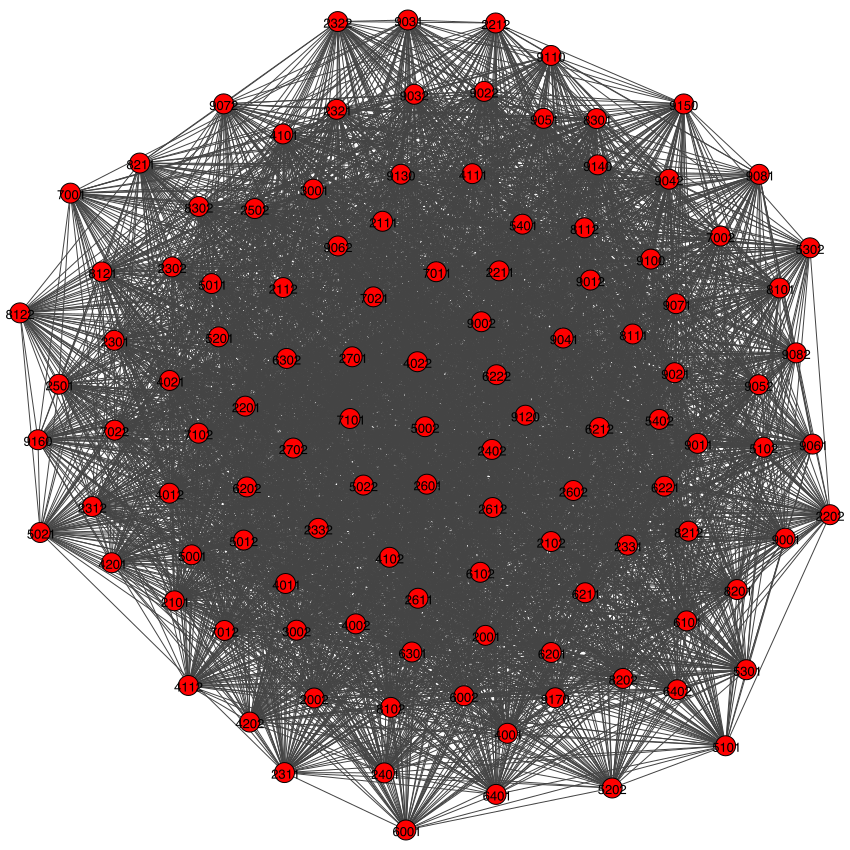

In [95]:
g_undir_td = ig.Graph.Adjacency(mat_td0, mode = 'undirected')
g_undir_td.vs["name"] = columns_td  # add additional info to the vs (vertex set)
g_undir_td.vs["label"] = columns_td
ig.plot(g_undir_td, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))



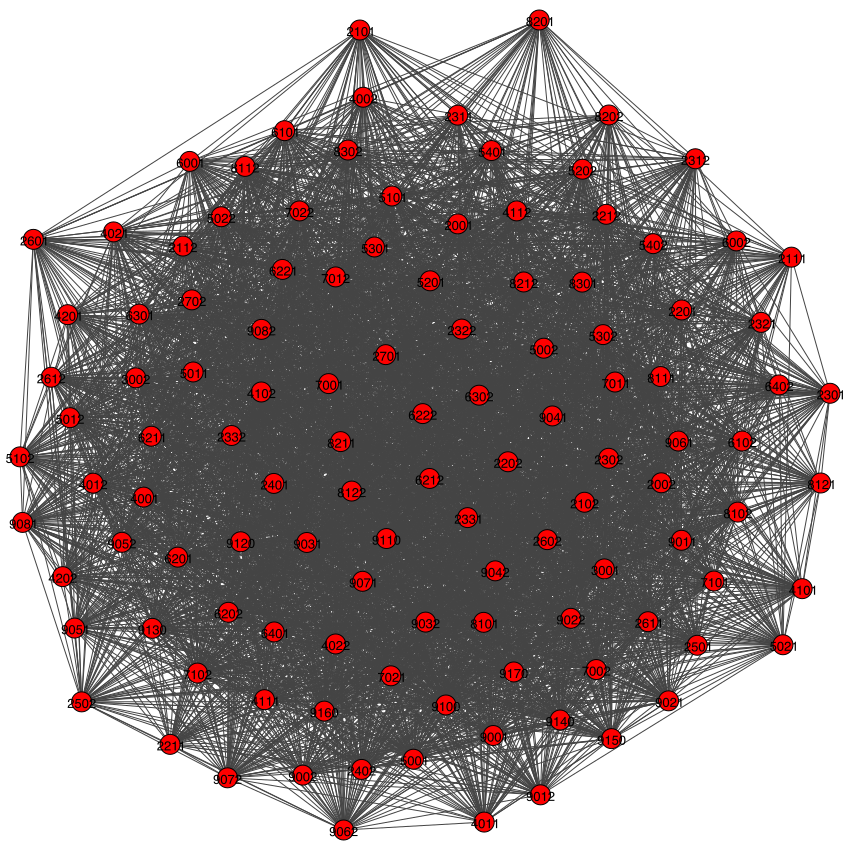

In [96]:
g_undir_asd = ig.Graph.Adjacency(mat_asd0, mode = 'undirected')
g_undir_asd.vs["name"] = columns_asd  # add additional info to the vs (vertex set)
g_undir_asd.vs["label"] = columns_asd
ig.plot(g_undir_asd, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))

In [97]:
print(f"Without Bonferroni: td - {c[0]}, asd - {c[1]} \nWith Bonferroni: td - {c[2]}, asd - {c[3]} ")

Without Bonferroni: td - 4392, asd - 4322 
With Bonferroni: td - 4243, asd - 4151 


So even with the bonferroni correction we still have a very large amount of edges in our graph, the rate of false discoveries is probably still very high. Anyways we thought that this is still reasonable since we are considering a two ROIs to be connected if their confidence intervals are either above or below zero so we are considering even really low correlations.

At this stage of our analysis it seems that we have more correlation in a typically developed brain, more on this later.

Let's see what happens if we use t = 0.5

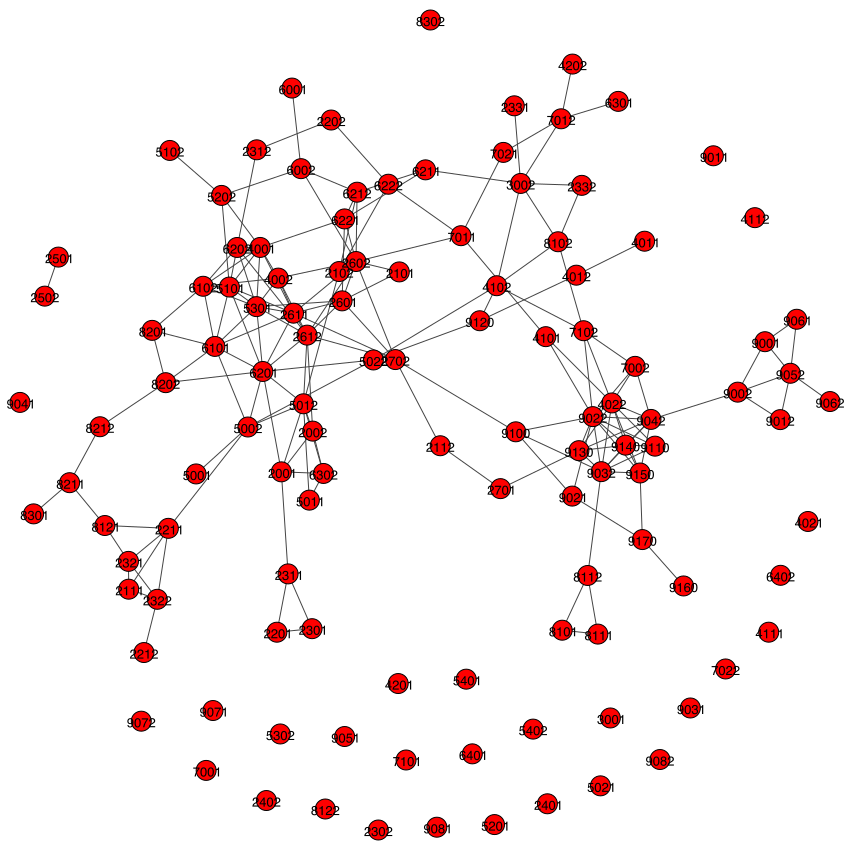

In [98]:

g_undir_td = ig.Graph.Adjacency(mat_td1, mode = 'undirected')
g_undir_td.vs["name"] = columns_td  # add additional info to the vs (vertex set)
g_undir_td.vs["label"] = columns_td
ig.plot(g_undir_td, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))


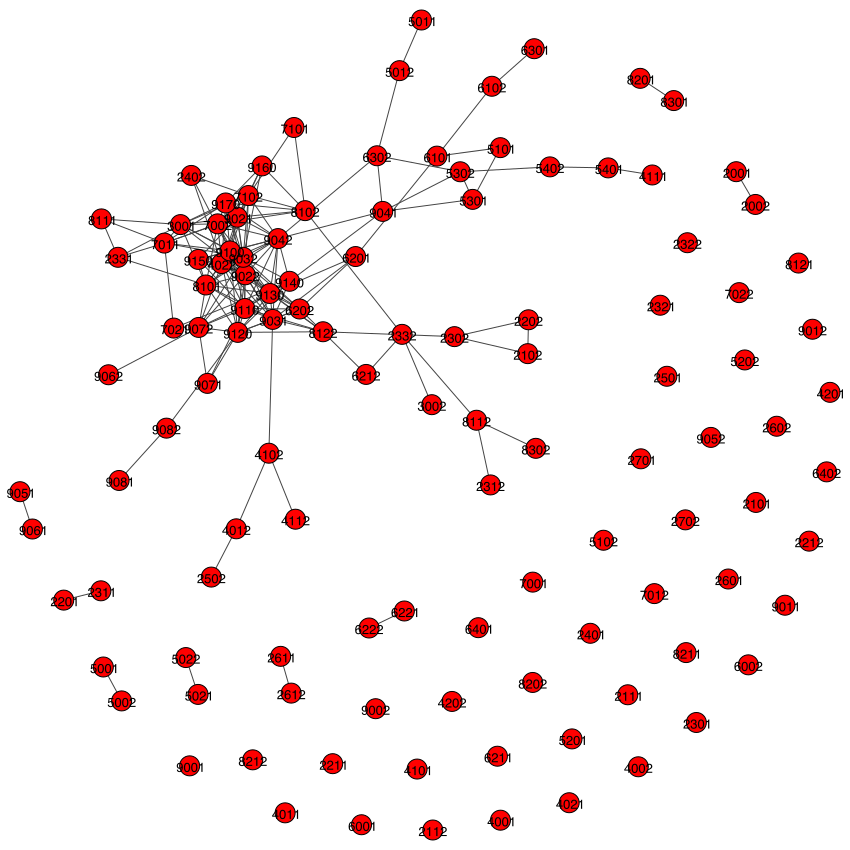

In [99]:
g_undir_asd = ig.Graph.Adjacency(mat_asd1, mode = 'undirected')
g_undir_asd.vs["label"] = columns_asd
ig.plot(g_undir_asd, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))

We repeat the last analysis, this time we set t = 0.7 so as to keep only the highly correlated ROIs

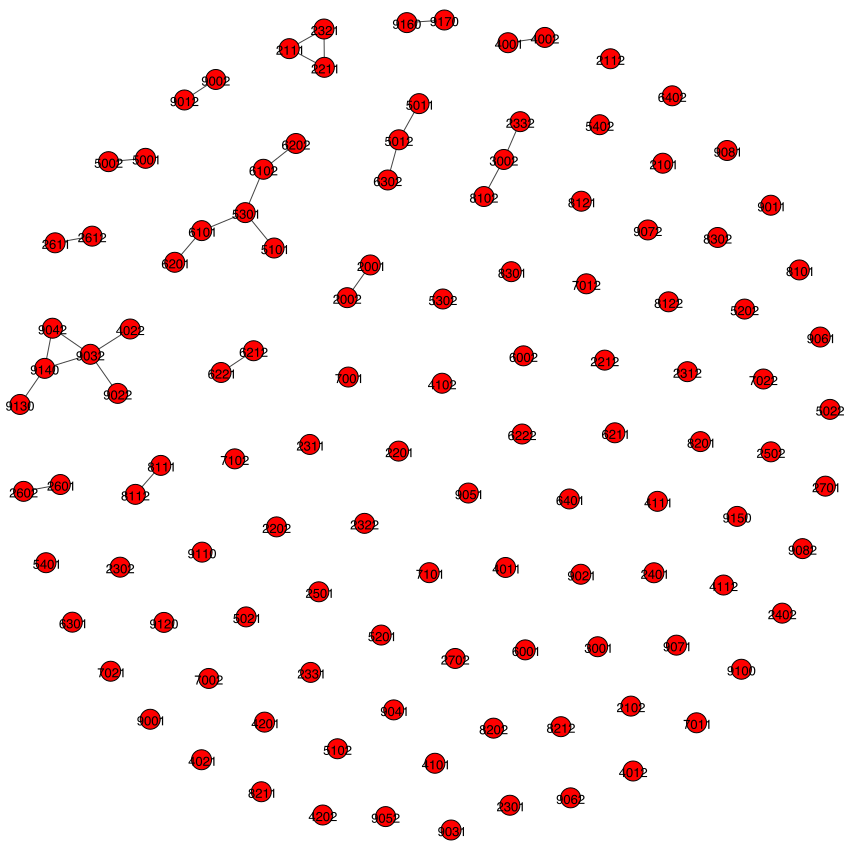

In [100]:

g_undir_td = ig.Graph.Adjacency(mat_td2, mode = 'undirected')
g_undir_td.vs["name"] = columns_td  # add additional info to the vs (vertex set)
g_undir_td.vs["label"] = columns_td
ig.plot(g_undir_td, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))

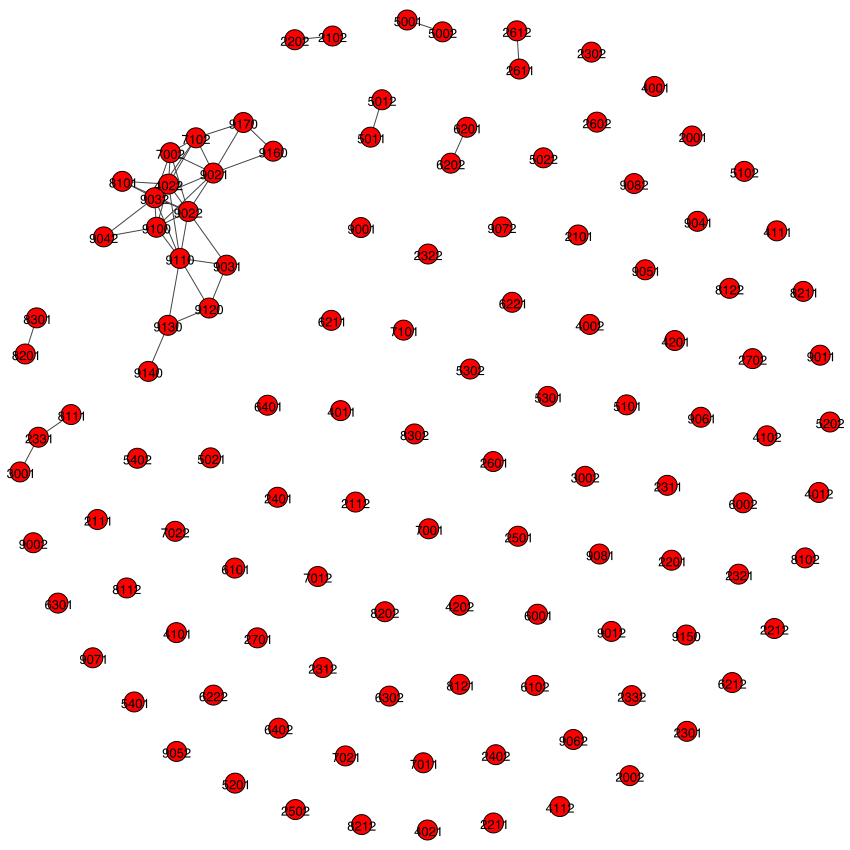

In [101]:
g_undir_asd = ig.Graph.Adjacency(mat_asd2, mode = 'undirected')
#g_undir_asd.vs["name"] = columns_asd  # add additional info to the vs (vertex set)
g_undir_asd.vs["label"] = columns_asd

ig.plot(g_undir_asd, layout="fr",vertex_label_size = 13, vertex_size = 20, bbox=(850,850))  

Lastly, we will plot the some of the few brave correlated ROIs left and compare them to some of the ones that were discarded

In [102]:
#below a list of the most correlated ROI (>0.8)
asd = 0
td = 0
for i in range(len(highly_corr)):
    if highly_corr[i][2] == "asd":
        asd += 1
    else:
        td += 1

print(f"Asd: {asd}, Td: {td}")
highly_corr

Asd: 12, Td: 5


[(0.8124911488632927, 0.8665931176254945, 'td', '2111', '2211'),
 (-0.9013810222697763, -0.8390219543177918, 'asd', '4022', '9022'),
 (-0.8755168831467807, -0.8339357434475342, 'asd', '4022', '9032'),
 (0.8080212326449949, 0.8534445641414434, 'asd', '5001', '5002'),
 (0.8036333162238667, 0.8689243245860115, 'td', '5012', '6302'),
 (0.8094792939839105, 0.8678469915611341, 'td', '6101', '6201'),
 (0.8086465203741338, 0.887023524441277, 'asd', '7002', '7102'),
 (0.8221158752572286, 0.8756305724248283, 'td', '8111', '8112'),
 (0.9356116015091764, 0.9595205328905609, 'asd', '9022', '9032'),
 (0.9325764037866746, 0.9496446753527751, 'asd', '9022', '9100'),
 (0.8459722517734838, 0.913814198840564, 'asd', '9031', '9110'),
 (0.8656286640757309, 0.8954471885480051, 'asd', '9031', '9120'),
 (0.9000595802906768, 0.938450908595748, 'asd', '9032', '9100'),
 (0.9002068721226706, 0.9268112541263472, 'asd', '9110', '9120'),
 (0.8408446104047794, 0.8902467913201926, 'asd', '9110', '9130'),
 (0.876410014

From this list of the most correlated ROIs we can actually see that the vast majority of the most correlated region of interest (>0.8) are actually the ones of the ASD subject, let's now compare how correlated are them in our td subject

We can actually observe that there are no ROIs in common between the most correlated regions between the asd subject and the td subject, below we can observe that there is still a correlation even in the typically developed subject even though is not as strong

0.9490602277491923


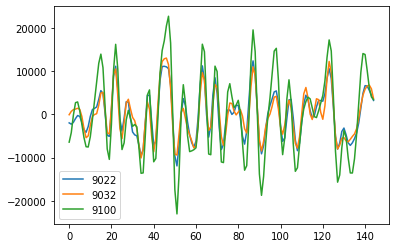

0.828199744365222


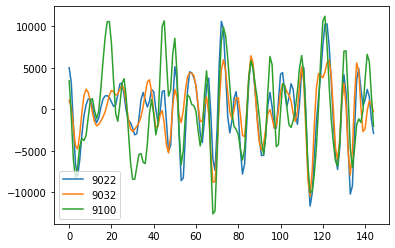

In [103]:
plt.plot(df_asd[columns_asd[95]])
plt.plot(df_asd[columns_asd[97]])
plt.plot(df_asd[columns_asd[108]])
plt.legend([columns_asd[95],columns_asd[97],columns_asd[108]])
print(df_asd[[columns_asd[95],columns_asd[97],columns_asd[108]]].corr().iloc[0,1])
plt.show()
plt.clf()




plt.plot(df_td[columns_td[95]])
plt.plot(df_td[columns_td[97]])
plt.plot(df_td[columns_td[108]])
print(df_td[[columns_td[95],columns_td[97],columns_td[108]]].corr().iloc[0,1])
plt.legend([columns_td[95],columns_td[97],columns_td[108]])

df_td[[columns_td[95],columns_td[97]]].corr().iloc[0,1]
plt.show()


In [104]:
#below a list of the most correlated ROI (>0.8) without the bonferroni correction
asd = 0
td = 0
for i in range(len(highly_corr_nb)):
    if highly_corr_nb[i][2] == "asd":
        asd += 1
    else:
        td += 1

print(f"Asd: {asd}, Td: {td}")
highly_corr_nb

Asd: 13, Td: 6


[(0.8126776054184295, 0.8657219536570879, 'td', '2111', '2211'),
 (-0.9003366003963221, -0.8411876765198698, 'asd', '4022', '9022'),
 (-0.8742275406838803, -0.8350232956441818, 'asd', '4022', '9032'),
 (0.8118712537008805, 0.8511404445772498, 'asd', '5001', '5002'),
 (0.8059985848538245, 0.8897422799693233, 'td', '5011', '5012'),
 (0.8071892360721371, 0.8656151994694283, 'td', '5012', '6302'),
 (0.8099943661772762, 0.8667986683515914, 'td', '6101', '6201'),
 (0.8136109511281417, 0.8864696529807659, 'asd', '7002', '7102'),
 (0.8245784017041797, 0.8727678771833494, 'td', '8111', '8112'),
 (0.8000259806903646, 0.8652849584582273, 'asd', '9021', '9100'),
 (0.9373151967655731, 0.959191618275835, 'asd', '9022', '9032'),
 (0.9336248844730403, 0.9488273003224059, 'asd', '9022', '9100'),
 (0.8511371247042194, 0.910658753845004, 'asd', '9031', '9110'),
 (0.8656701517722994, 0.8949773809444361, 'asd', '9031', '9120'),
 (0.9008959853764544, 0.9364281304347939, 'asd', '9032', '9100'),
 (0.900224043

In [105]:
print(f"Without bonferroni and t = 0.5: td - {cb1_td} , asd - {cb1_asd} , \nWith bonferroni and t = 0.5: td - {c[4]}, asd - {c[5]}")

Without bonferroni and t = 0.5: td - 196 , asd - 196 , 
With bonferroni and t = 0.5: td - 184, asd - 190


As we expected with bonferroni we have slightly bigger confidence intervals and this allows for a stricter selection, resulting in fewer ROIs selected in our analysis, obviusly as t gets closer to zero we have a larger delta between the ones with and without bonferroni.

In [106]:
#As seen above
print(f"Without Bonferroni: td - {c[0]}, asd - {c[1]} \nWith Bonferroni: td - {c[2]}, asd - {c[3]} ")

Without Bonferroni: td - 4392, asd - 4322 
With Bonferroni: td - 4243, asd - 4151 
